# Distributions
A distribution is a set of possible outcomes and their corresponding probabilities.

> If the outcomes in a distribution are discrete, we can describe the distribution with a probability mass function, or PMF, which is a function that maps from each possible outcome to its probability.

In [147]:
from empiricaldist import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [148]:
dice = Pmf.from_seq([1,2,3,4,5,6])
dice

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [149]:
letters = Pmf.from_seq(list("Mississippi"))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [150]:
letters["s"]

0.36363636363636365

In [151]:
letters("s") #this way if we query for something that's not in the distribution, we don't get an error, but instead we get a 0 probability

0.36363636363636365

# The cookie problem, revisited

In [152]:
prior = Pmf.from_seq(["Bowl 1", "Bowl 2"])
prior #that's called prior distribution

,probs
Bowl 1,0.5
Bowl 2,0.5


In [153]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [154]:
posterior.normalize()
posterior #that's called posterior distribution

,probs
Bowl 1,0.6
Bowl 2,0.4


In [155]:
#what if we put the cookie back to the corresponding bowl, and then retrieve a new cookie from the same bowl, and it's vanilla again?
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [156]:
likelihood_chocolate = [0.25,0.5]

posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


# The 101 Bowls problem

In [157]:
import numpy as np

hypos = np.arange(101)
prior = Pmf(1,hypos) # the first parameter specifies that each discrete event has a proability of 1 (after, the probabilities will be normalized)
prior.normalize()
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [158]:
likelihood_vanilla = hypos / 100

posterior1 = prior*likelihood_vanilla
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


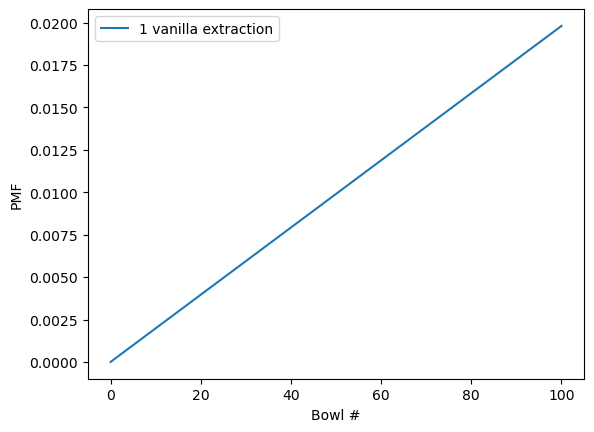

In [159]:
import matplotlib.pyplot as plt

plt.plot(hypos,posterior1,label='1 vanilla extraction')
plt.xlabel('Bowl #')
plt.ylabel('PMF')

plt.legend()
plt.show()

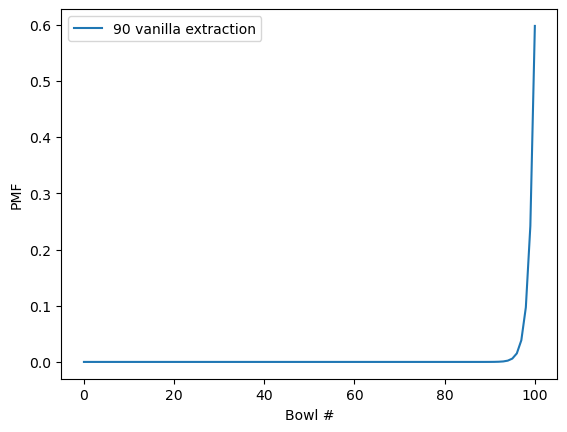

In [160]:
posterior90 = posterior1
for i in range(0,89):
    posterior90 = posterior90 * likelihood_vanilla
    posterior90.normalize()
    
plt.plot(hypos,posterior90,label='90 vanilla extraction')
plt.xlabel('Bowl #')
plt.ylabel('PMF')

plt.legend()
plt.show()

In [161]:
likelihood_chocolate = 1 - hypos/100
posterior2 = posterior1 * likelihood_chocolate
posterior2.normalize()
posterior2

,probs
0,0.000000
1,0.000594
2,0.001176
3,0.001746
4,0.002304
...,...
96,0.002304
97,0.001746
98,0.001176
99,0.000594


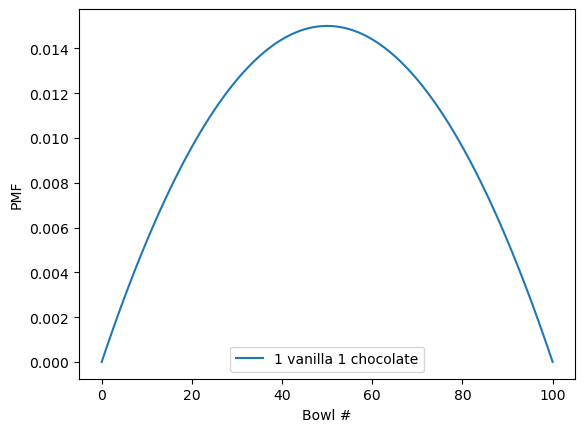

In [162]:
plt.plot(hypos,posterior2,label='1 vanilla 1 chocolate')
plt.xlabel('Bowl #')
plt.ylabel('PMF')

plt.legend()
plt.show()

The quantity of the highest posterior probability is called *MAP*, which stands for "maximum a posteriori probability".

In [163]:
# MAP:
posterior2.idxmax() # coming from Pandas

50

In [164]:
posterior2.max_prob() # coming from Pmf

50

> It's all about estimating proportions!
 
You don't know what fraction of cookies are vanilla , but you think it is equally likely to be any fraction from 0 to 1. If you draw two cookies and only one is vanilla, what proportion of cookies in the bowl do you think are vanilla? The posterior distribution we just computed is the answer to that question.

# The dice problem

In [165]:
hypos = [6,8,12]
prior = Pmf(1/3,hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [166]:
prior.qs # quantities of the distribution

array([ 6,  8, 12])

In [167]:
prior.ps # corresponding probabilities

array([0.33333333, 0.33333333, 0.33333333])

In [174]:
likelihood1 = 1/6,1/8,1/12

posteriorDice = prior*likelihood1
posteriorDice.normalize()
posteriorDice

,probs
6,0.444444
8,0.333333
12,0.222222


In [169]:
likelihood_rolling7 = 0,1/8,1/12

posteriorDice *= likelihood_rolling7
posteriorDice.normalize()
posteriorDice

,probs
6,0.000000
8,0.692308
12,0.307692


In [170]:
def update_dice(pmf: Pmf, data):
    """update pmf based on new data"""
    hypos = pmf.qs #selecting quantities that represent hypotheses
    likelihood = 1/hypos # here for example in a 12-face dice, the probability of a number is 1/12
    impossible = data > hypos # if the dice is a 6-face dice, the probability of a 7 is 0, so we have to spot those occurrences
    # impossible is a boolean series that's true for every impossible outcome
    
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [171]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


In [172]:
update_dice(pmf,1)
update_dice(pmf,7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
